In [1]:
# Install necessary packages
!pip install pandas scikit-learn seaborn matplotlib scipy pheatmap

In [18]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pheatmap
from kneed import KneeLocator


In [3]:
# Read the dataset
survey_df = pd.read_csv("E:/BOOTCAMP/ASSIGNMENTS/SCMA/Survey.csv")

In [10]:
# Install necessary packages
!pip install pandas scikit-learn seaborn matplotlib scipy kneed

In [12]:
# Select the relevant columns for clustering
sur_int = survey_df.iloc[:, 19:46]

In [13]:
# Standardize the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [14]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=25, random_state=0)
    kmeans.fit(sur_int_scaled)
    wcss.append(kmeans.inertia_)

D:\New folder\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

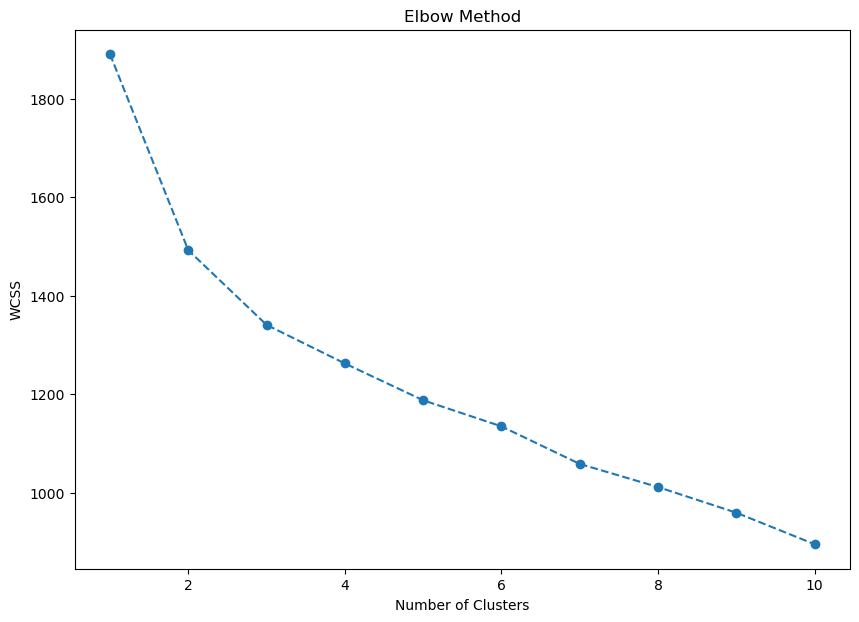

In [15]:
# Plot the elbow method
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Use KneeLocator to find the elbow point
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
n_clusters = kl.elbow
print(f'Optimal number of clusters: {n_clusters}')

Optimal number of clusters: 3


In [21]:
# Perform K-means clustering
set_seed = 123
np.random.seed(set_seed)
km_res = KMeans(n_clusters=n_clusters, n_init=25, random_state=set_seed)
km_res.fit(sur_int_scaled)

D:\New folder\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=25, random_state=123)

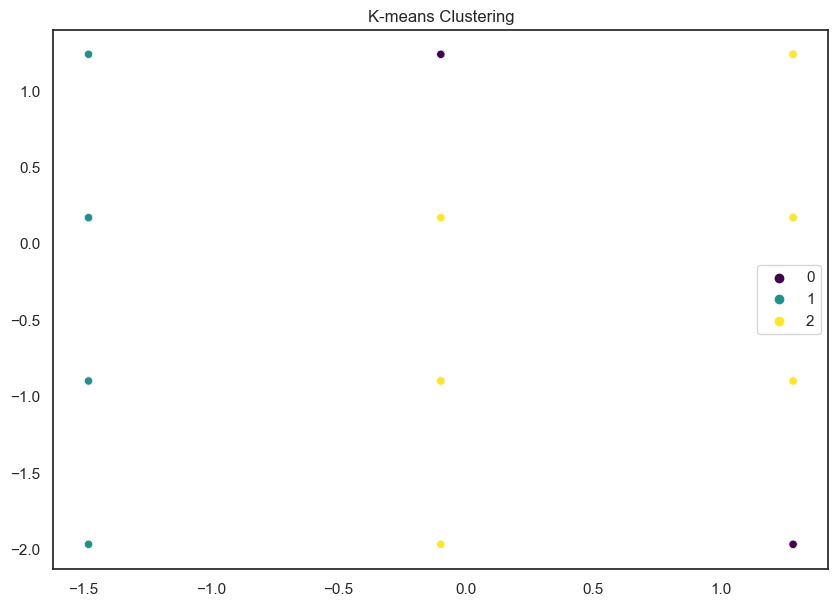

In [22]:
# Visualize K-means clustering results
sns.set(style="white")
plt.figure(figsize=(10, 7))
sns.scatterplot(x=sur_int_scaled[:, 0], y=sur_int_scaled[:, 1], hue=km_res.labels_, palette="viridis")
plt.title('K-means Clustering')
plt.show()


In [23]:
# Perform hierarchical clustering
linked = linkage(sur_int_scaled, method='ward')

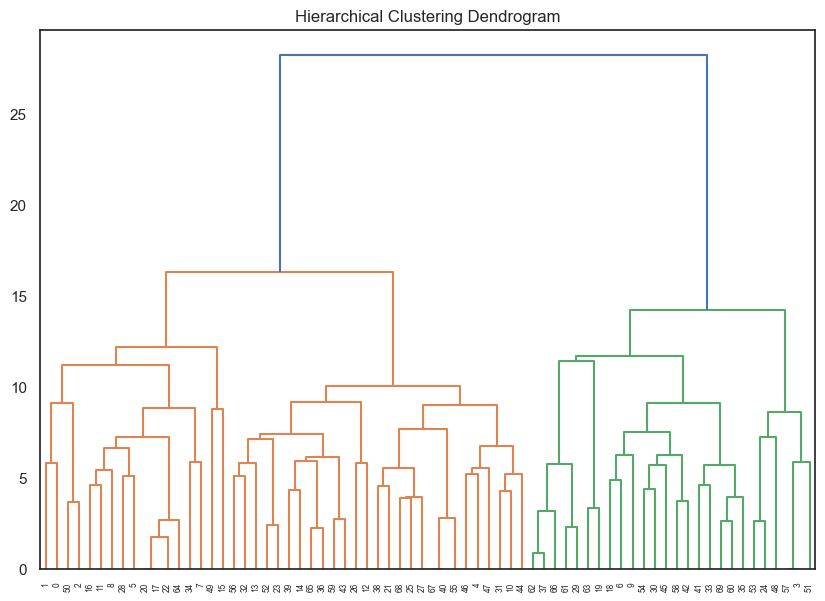

In [24]:

# Visualize hierarchical clustering results
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, color_threshold=0.7 * max(linked[:, 2]))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [25]:
# Cut the dendrogram to form flat clusters
res_hc = cut_tree(linked, n_clusters=n_clusters).flatten()

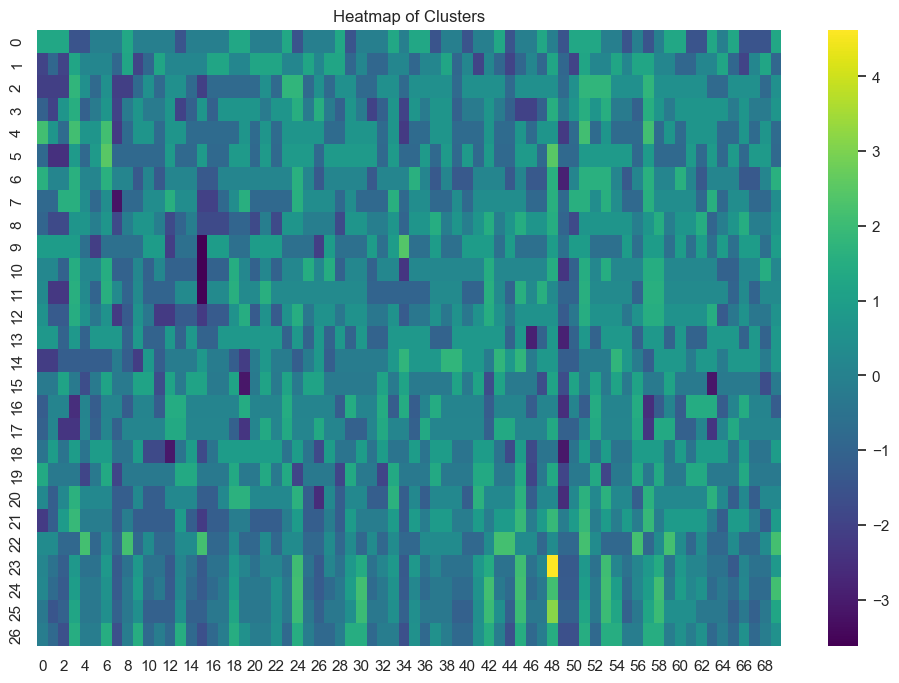

In [26]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(sur_int_scaled).transpose(), annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Clusters')
plt.show()